# Assignment RF-Rashmi 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = datasets.load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [7]:
model.predict(X_test)

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [8]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy visualization
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
print(feat_imp)

                         Feature  Importance
9                color_intensity    0.180198
6                     flavanoids    0.165947
0                        alcohol    0.142041
12                       proline    0.126080
11  od280/od315_of_diluted_wines    0.096032
10                           hue    0.085966
5                  total_phenols    0.059758
4                      magnesium    0.034673
3              alcalinity_of_ash    0.033211
8                proanthocyanins    0.029778
1                     malic_acid    0.028976
2                            ash    0.011859
7           nonflavanoid_phenols    0.005480


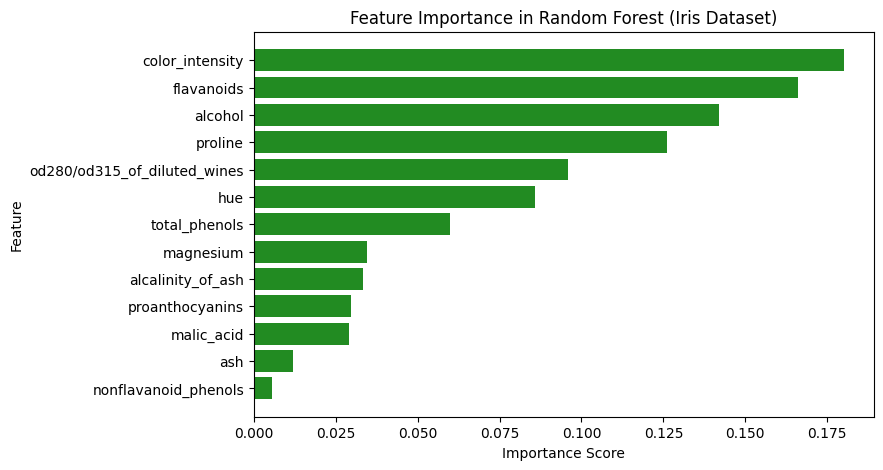

In [9]:
plt.figure(figsize=(8,5))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='forestgreen')
plt.gca().invert_yaxis()  # Highest importance at top
plt.title("Feature Importance in Random Forest (Iris Dataset)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()